In [1]:
import time
start_time=time.time()

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import pickle
import itertools
import shutil

import statsmodels.api as sm
from scipy import interpolate

In [3]:
reg=['604','595']
inst=['I','T']
lin=['H','N','O','S']
sam=['A','B','C']
ms=['H','V']

In [4]:
n=7
pc=4.16
tl="24"

In [5]:
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]=tl

In [6]:
rg='604\\'
r=0
i=1
l=2
s=1
m=1

datat=reg[r]+inst[i]+lin[l]+sam[s]+ms[m]
datat

'604TOBV'

In [7]:
#xx

In [8]:
#folder=reg[r]+'//'+inst[i]+'//'+lin[l]+'//'+sam[s]+'//'+ms[m]
#folder

In [9]:
os.mkdir(rg+datat)

Structure Function

In [10]:
xi=5
xf=17

In [11]:
pickle_in = open('Datos\\'+datat+'//'+'S.pkl',"rb")
SF = pickle.load(pickle_in)
datax=SF

In [12]:
SFData=dict()
SFD=dict()



for i in range(n):
    al=np.log10(datax[i].Lag)
    bl=np.log10(datax[i].Nmqvd)
    cl=np.log10(datax[i].ErrY)
    x,y,z=np.array(al[xi:xf]),np.array(bl[xi:xf]),np.array(cl[xi:xf])
    x = sm.add_constant(x)
    #model = sm.OLS(y, x)
    model = sm.WLS(y, x,weights=1./(z**2))
    SFData[i] = model.fit()
    SFD[i]=[SFData[i].params[1],SFData[i].bse[1],SFData[i].params[0],SFData[i].bse[0],
         SFData[i].rsquared,datax[i].Lag[xi],datax[i].Lag[xf]]
    #SFD[i]=pd.DataFrame(XX).T

SFD=pd.DataFrame(SFD).T
SFD.rename(columns={0:'A',1:'DA',2:'B',3:'DB',4:'C',5:'E',6:'F'}, inplace=True)
SFD.loc['Promedio'] = SFD.mean()
SFD

,A,DA,B,DB,C,E,F
0,0.323427,0.014171,1.482107,0.017110,0.981163,9.0,27.0
1,0.283360,0.016044,1.513178,0.019213,0.968938,9.0,27.0
2,0.180586,0.013838,1.615140,0.016390,0.944538,9.0,27.0
3,0.059901,0.014077,1.726527,0.016413,0.644206,9.0,27.0
4,0.057733,0.013964,1.728961,0.016278,0.630899,9.0,27.0
5,0.046656,0.014483,1.735201,0.016802,0.509277,9.0,27.0
6,0.032071,0.013368,1.749058,0.015507,0.365306,9.0,27.0
Promedio,0.140534,0.014278,1.650025,0.016816,0.720618,9.0,27.0


In [13]:
SFD=SFD.round(decimals=3)
SFDx=(SFD.groupby(SFD.columns.str[-1], axis=1).apply(lambda x: x.astype(str).apply('$\pm$'.join, 1)))
SFres=SFDx[['A','B','C']].copy()

In [14]:
SFres=SFres.assign(D=SFD.E*pc)
SFres=SFres.assign(E=SFD.F*pc)

In [15]:
SFres.rename(columns={'A':'$\\alpha$','B':'$\epsilon$','C':'R','D':'L$_{0}$ [pc]','E':'L$_{F}$ [pc]'}, inplace=True)

In [16]:
SFres=SFres.round(decimals=3)
SFres

,$\alpha$,$\epsilon$,R,L$_{0}$ [pc],L$_{F}$ [pc]
0,0.323$\pm$0.014,1.482$\pm$0.017,0.981,37.44,112.32
1,0.283$\pm$0.016,1.513$\pm$0.019,0.969,37.44,112.32
2,0.181$\pm$0.014,1.615$\pm$0.016,0.945,37.44,112.32
3,0.06$\pm$0.014,1.727$\pm$0.016,0.644,37.44,112.32
4,0.058$\pm$0.014,1.729$\pm$0.016,0.631,37.44,112.32
5,0.047$\pm$0.014,1.735$\pm$0.017,0.509,37.44,112.32
6,0.032$\pm$0.013,1.749$\pm$0.016,0.365,37.44,112.32
Promedio,0.141$\pm$0.014,1.65$\pm$0.017,0.721,37.44,112.32


In [17]:
SFres.to_latex(rg+datat+'//'+'a.tex', escape=False, caption=datat+'a')

In [18]:
SFdisc = SFD[['A','DA']].copy()

In [19]:
exp1=2/3
SFdisc=SFdisc.assign(B=((SFD.A-exp1)/exp1)*100)

exp2=5/3
SFdisc=SFdisc.assign(C=((SFD.A-exp2)/exp2)*100)

In [20]:
#SFdisc

In [21]:
#print(SFData[0].summary())

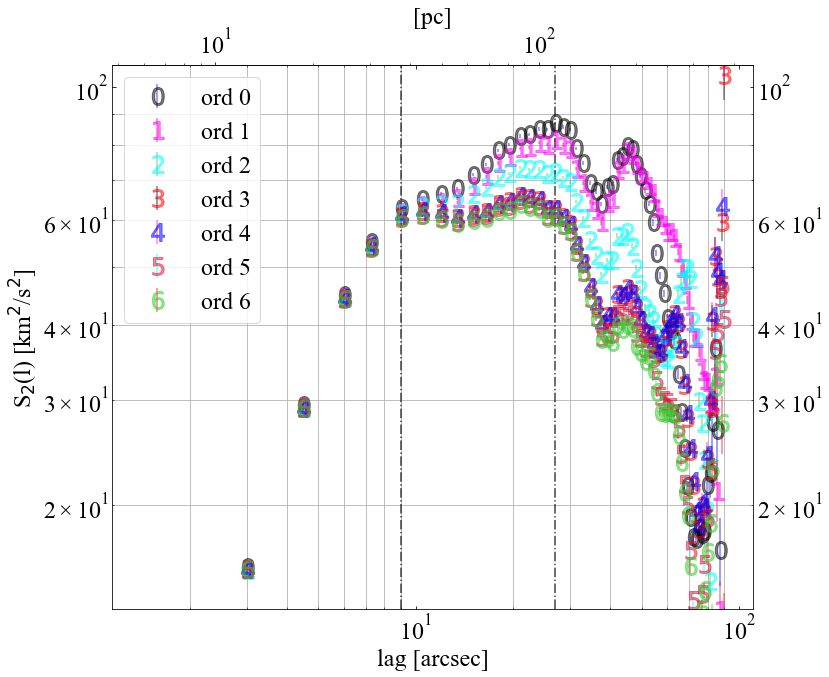

In [22]:

#dt=SFPr

yi=xi
yf=xf

marker=itertools.cycle((r"$0$",r"$1$",r"$2$",r"$3$",r"$4$",r"$5$",r"$6$"))
color=itertools.cycle(("black","blue","magenta","crimson","cyan","limegreen","red"))

#marker=itertools.cycle(('o','^','s','h','*','p','v'))
#color=itertools.cycle(('b','y','r','c','m','k','g'))

mx=datax[0].iloc[:,1].max()*1.25
mn=datax[0].iloc[1,1]*0.85

fig, ax=plt.subplots(figsize=(11.5,10))

for i in range(n):
    ax.errorbar(datax[i].iloc[:,0],datax[i].iloc[:,1], yerr=datax[i].iloc[:,2],  
                marker=next(marker), fmt=' ',color=next(color), ecolor=next(color), alpha=0.5, markersize=18, label='ord ' + str(i))
    
#for i in range(n):
#    ax.errorbar(dt[i][0],dt[i][1],  fmt='-',color=next(color))

ax.set(xscale='log',yscale='log')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')
#plt.title('Función de estructura, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='best')
#ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.grid(which='minor')
plt.ylim(mn,mx)
#########################################################
plt.axvline(x=datax[0].iloc[xi,0], color='k', linestyle='-.', alpha=0.75)
plt.axvline(x=datax[0].iloc[xf,0], color='k', linestyle='-.', alpha=0.75)

def forward(x):
    return pc*x


def inverse(x):
    return pc*x

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.set_xlabel('[pc]')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]=tl
fig.savefig(rg+datat+'//'+'S.pdf')

Structure Function Norm

In [23]:
pickle_in = open('Datos\\'+datat+'//'+'SN.pkl',"rb")
SFN = pickle.load(pickle_in)
datax=SFN

In [24]:
SFNData=dict()


for i in range(n):
    x=SFN[i]['Lag']*pc
    y=SFN[i]['Nmqvd']-2
    tck=interpolate.splrep(x,y,s=0)
    grid=np.linspace(x.min(),x.max(),num=len(x))
    ynew=interpolate.splev(grid,tck,der=0)

    inter=pd.DataFrame([grid,ynew]).T
    SFNData[i]=interpolate.sproot(tck)

In [25]:
SFND=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in SFNData.items() ])).T
SFND.rename(columns={0:'1',1:'2',2:'3',3:'4',4:'5',5:'6',6:'7',7:'8',8:'9',9:'10'}, inplace=True)
SFND=SFND.round(decimals=0)

SFND

,1,2,3,4,5
0,60.0,142.0,170.0,208.0,NaN
1,62.0,139.0,171.0,219.0,NaN
2,34.0,139.0,NaN,NaN,NaN
3,29.0,134.0,350.0,351.0,366.0
4,29.0,134.0,349.0,351.0,365.0
5,28.0,135.0,NaN,NaN,NaN
6,28.0,136.0,NaN,NaN,NaN


https://stackoverflow.com/questions/19736080/creating-dataframe-from-a-dictionary-where-entries-have-different-lengths

In [26]:
SFND.to_latex(rg+datat+'//'+'b.tex', escape=False, caption=datat+'b')

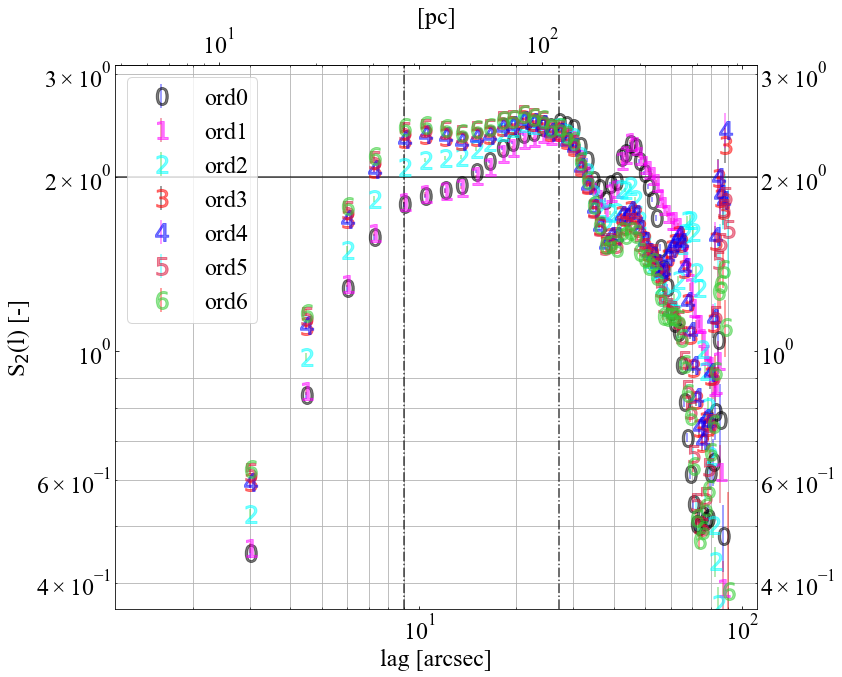

In [27]:
#dt=SFNPr

yi=xi
yf=xf

marker=itertools.cycle((r"$0$",r"$1$",r"$2$",r"$3$",r"$4$",r"$5$",r"$6$"))
color=itertools.cycle(("black","blue","magenta","crimson","cyan","limegreen","red"))

mx=datax[0].iloc[:,1].max()*1.25
mn=datax[0].iloc[1,1]*0.8

fig, ax=plt.subplots(figsize=(11.5,10))

for i in range(n):
    ax.errorbar(datax[i].iloc[:,0],datax[i].iloc[:,1], yerr=datax[i].iloc[:,2],  
                marker=next(marker), fmt=' ',color=next(color), ecolor=next(color), alpha=0.5, markersize=18, label='ord' + str(i))

#for i in range(n):
#    ax.errorbar(dt[i][0],dt[i][1],  fmt='-',color=next(color))

ax.set(xscale='log',yscale='log')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [-]')
#plt.title('Función de estructura, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='best')
#ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.grid(which='minor')
plt.ylim(mn,mx)
#########################################################
plt.axvline(x=datax[0].iloc[xi,0], color='k', linestyle='-.', alpha=0.75)
plt.axvline(x=datax[0].iloc[xf,0], color='k', linestyle='-.', alpha=0.75)
plt.axhline(y=2, color='k', linestyle='-', alpha=0.75)


def forward(x):
    return pc*x


def inverse(x):
    return pc*x

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.set_xlabel('[pc]')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]=tl

fig.savefig(rg+datat+'//'+'SN.pdf')

Structure Function WH

In [28]:
xi=150
xf=350

In [29]:
pickle_in = open('Datos\\'+datat+'//'+'SH.pkl',"rb")
SFH = pickle.load(pickle_in)
datax=SFH

In [30]:
SFHData=dict()
SFHD=dict()

for i in range(n):
    al=np.log10(datax[i].Lag)
    bl=np.log10(datax[i].Nmqvd)
    cl=np.log10(datax[i].ErrY)
    x,y,z=np.array(al[xi:xf]),np.array(bl[xi:xf]),np.array(cl[xi:xf])
    x = sm.add_constant(x)
    #model = sm.OLS(y, x)
    model = sm.WLS(y, x,weights=1./(z**2))
    SFHData[i] = model.fit()
    SFHD[i]=[SFHData[i].params[1],SFHData[i].bse[1],SFHData[i].params[0],SFHData[i].bse[0],
         SFHData[i].rsquared,datax[i].Lag[xi],datax[i].Lag[xf]]
    #SFD[i]=pd.DataFrame(XX).T

SFHD=pd.DataFrame(SFHD).T
SFHD.rename(columns={0:'A',1:'DA',2:'B',3:'DB',4:'C',5:'E',6:'F'}, inplace=True)
SFHD.loc['Promedio'] = SFHD.mean()
SFHD

,A,DA,B,DB,C,E,F
0,0.514590,0.029090,1.284723,0.035486,0.612466,12.26307,23.314969
1,0.474904,0.029757,1.307434,0.036313,0.562624,12.26307,23.314969
2,0.427721,0.029409,1.353237,0.035863,0.516520,12.26307,23.314969
3,0.320743,0.036258,1.445568,0.044407,0.283265,12.26307,23.314969
4,0.319178,0.036353,1.446745,0.044527,0.280229,12.26307,23.314969
5,0.222317,0.039677,1.567659,0.048795,0.136861,12.26307,23.314969
6,0.241304,0.039733,1.541532,0.048896,0.157028,12.26307,23.314969
Promedio,0.360109,0.034325,1.420985,0.042041,0.364142,12.26307,23.314969


In [31]:
SFdisc=SFdisc.assign(D=((SFHD.A-SFD.A)/SFD.A)*100)
SFdisc.loc['Promedio'] = SFdisc.mean()

In [32]:
SFdisc

,A,DA,B,C,D
0,0.323000,0.014000,-51.55000,-80.6200,59.315901
1,0.283000,0.016000,-57.55000,-83.0200,67.810766
2,0.181000,0.014000,-72.85000,-89.1400,136.310199
3,0.060000,0.014000,-91.00000,-96.4000,434.572230
4,0.058000,0.014000,-91.30000,-96.5200,450.307271
5,0.047000,0.014000,-92.95000,-97.1800,373.015742
6,0.032000,0.013000,-95.20000,-98.0800,654.076487
Promedio,0.140625,0.014125,-78.90625,-91.5625,291.350590


In [33]:
SFdisc=SFdisc.round(decimals=3)
SFdiscx=(SFdisc.groupby(SFdisc.columns.str[-1], axis=1).apply(lambda x: x.astype(str).apply('$\pm$'.join, 1)))
SFdis=SFdiscx[['A','B','C','D']].copy()
SFdis.rename(columns={'A':'$\\alpha$','B':'2/3','C':'5/3','D':'SF$_{WH}$'}, inplace=True)

In [34]:
SFdis

,$\alpha$,2/3,5/3,SF$_{WH}$
0,0.323$\pm$0.014,-51.55,-80.62,59.316
1,0.283$\pm$0.016,-57.55,-83.02,67.811
2,0.181$\pm$0.014,-72.85,-89.14,136.31
3,0.06$\pm$0.014,-91.0,-96.4,434.572
4,0.058$\pm$0.014,-91.3,-96.52,450.307
5,0.047$\pm$0.014,-92.95,-97.18,373.016
6,0.032$\pm$0.013,-95.2,-98.08,654.076
Promedio,0.141$\pm$0.014,-78.906,-91.562,291.351


In [35]:
SFdis.to_latex(rg+datat+'//'+'c.tex', escape=False, caption=datat+'c')

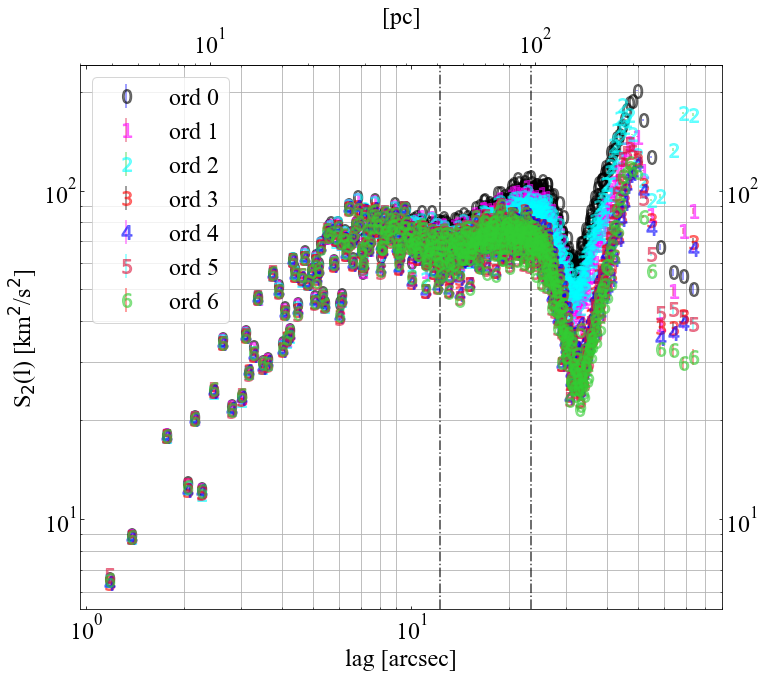

In [36]:
#dt=SFwh1Pr

marker=itertools.cycle((r"$0$",r"$1$",r"$2$",r"$3$",r"$4$",r"$5$",r"$6$"))
color=itertools.cycle(("black","blue","magenta","crimson","cyan","limegreen","red"))

mx=datax[0].iloc[:,1].max()*1.25
mn=datax[0].iloc[1,1]*0.6

fig, ax=plt.subplots(figsize=(11.5,10))

for i in range(n):
    ax.errorbar(datax[i].iloc[:,0],datax[i].iloc[:,1], yerr=datax[i].iloc[:,2],  
                marker=next(marker), fmt=' ',color=next(color), ecolor=next(color), alpha=0.5, markersize=14, label='ord ' + str(i))

#for i in range(n):
#    ax.errorbar(dt[i][0],dt[i][1],  fmt='-',color=next(color))

ax.set(xscale='log',yscale='log')
ax.set(xlabel='lag [arcsec]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')
#plt.title('Función de estructura, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='best')
#ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.grid(which='minor')
#plt.ylim(mn,mx)
#########################################################
plt.axvline(x=datax[0].iloc[xi,0], color='k', linestyle='-.', alpha=0.75)
plt.axvline(x=datax[0].iloc[xf,0], color='k', linestyle='-.', alpha=0.75)

def forward(x):
    return pc*x


def inverse(x):
    return pc*x

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.set_xlabel('[pc]')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]=tl

fig.savefig(rg+datat+'//'+'SWH.pdf')

Auto correlation Function

In [37]:
pickle_in = open('Datos\\'+datat+'//'+'AF.pkl',"rb")
AF = pickle.load(pickle_in)

In [38]:
AFData=dict()

for i in range(n):
    x=AF[i]['Lag']*pc
    y=AF[i]['Nmqvd']
    tck=interpolate.splrep(x,y,s=0)
    grid=np.linspace(x.min(),x.max(),num=len(x))
    ynew=interpolate.splev(grid,tck,der=0)

    inter=pd.DataFrame([grid,ynew]).T
    AFData[i]=interpolate.sproot(tck)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:732: RuntimeWarning: The number of zeros exceeds mest
  warnings.warn(RuntimeWarning("The number of zeros exceeds mest"))


In [39]:
AFD=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in AFData.items() ])).T
AFD.rename(columns={0:'1',1:'2',2:'3',3:'4',4:'5',5:'6',6:'7',7:'8',8:'9',9:'10'}, inplace=True)
AFD=AFD.round(decimals=0)
AFD

,1,2,3,4,5,6,7,8,9,10
0,76.0,144.0,148.0,151.0,157.0,241.0,NaN,NaN,NaN,NaN
1,75.0,142.0,160.0,245.0,NaN,NaN,NaN,NaN,NaN,NaN
2,31.0,58.0,72.0,140.0,170.0,197.0,266.0,322.0,NaN,NaN
3,27.0,59.0,85.0,136.0,172.0,287.0,338.0,354.0,365.0,NaN
4,27.0,59.0,85.0,136.0,172.0,289.0,339.0,353.0,365.0,NaN
5,27.0,59.0,87.0,138.0,173.0,257.0,268.0,270.0,359.0,NaN
6,27.0,58.0,89.0,139.0,173.0,260.0,264.0,275.0,279.0,290.0


In [40]:
AFD.to_latex(rg+datat+'//'+'d.tex', escape=False, caption=datat+'d')

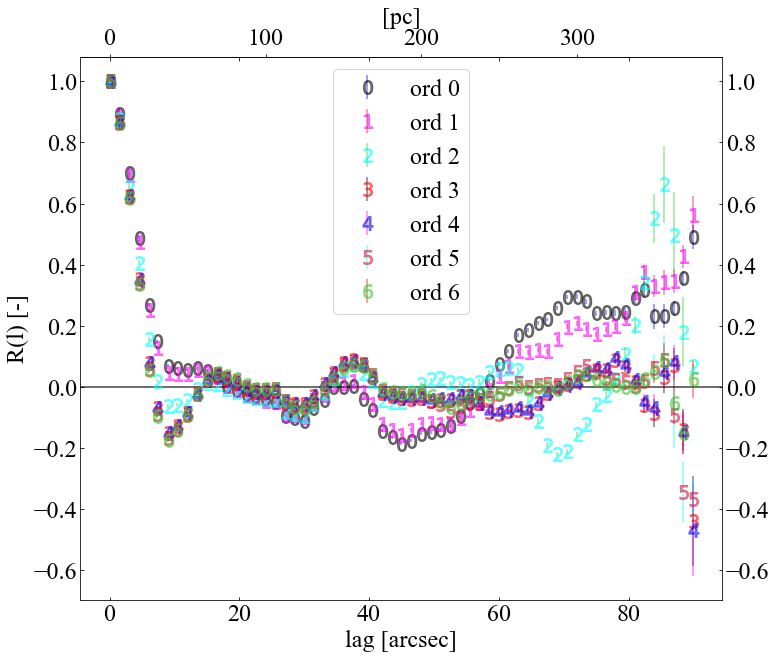

In [41]:
datax=AF
#dt=SFwh1Pr

marker=itertools.cycle((r"$0$",r"$1$",r"$2$",r"$3$",r"$4$",r"$5$",r"$6$"))
color=itertools.cycle(("black","blue","magenta","crimson","cyan","limegreen","red"))

#mx=datax[0].iloc[:,1].max()*1.25
#mn=datax[0].iloc[1,1]*0.6

fig, ax=plt.subplots(figsize=(11.5,10))

for i in range(n):
    ax.errorbar(datax[i].iloc[:,0],datax[i].iloc[:,1], yerr=datax[i].iloc[:,2],  
                marker=next(marker), fmt=' ',color=next(color), ecolor=next(color), alpha=0.5, markersize=14, label='ord ' + str(i))

#for i in range(n):
#    ax.errorbar(dt[i][0],dt[i][1],  fmt='-',color=next(color))

#ax.set(xscale='log',yscale='log')
ax.set(xlabel='lag [arcsec]', ylabel='R(l) [-]')
#plt.title('Función de estructura, $S_{2}(l)$')
plt.tick_params(which='both', labelright=True, direction='in', right=True,  top=True)
plt.legend(loc='best')
#ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.grid(which='minor')
#plt.ylim(mn,mx)
#########################################################
plt.axhline(y=0, color='k', linestyle='-', alpha=0.75)
#plt.axvline(x=datax[0].iloc[xf-1,0], color='k', linestyle='-.', alpha=0.75)

def forward(x):
    return pc*x


def inverse(x):
    return pc*x

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
secax.set_xlabel('[pc]')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]=tl

plt.savefig(rg+datat+'//'+'AC.pdf')

In [42]:
#os.mkdir(rg+datat)

In [43]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 14.519781827926636 seconds ---
